# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('base_tratada.csv', sep = ';', decimal = ',')
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [7]:
df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


In [11]:
df.isna().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [21]:
df.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [15]:
# Separar variáveis explicativas (X) e resposta (y)
X = df.drop('mau', axis=1)
y = df['mau']

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train: (11655, 28)
X_test : (4995, 28)
y_train: (11655,)
y_test : (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [17]:
# Criar o modelo (árvore de decisão)
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [20]:
# 2) Treinar o objeto com os dados de treino
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

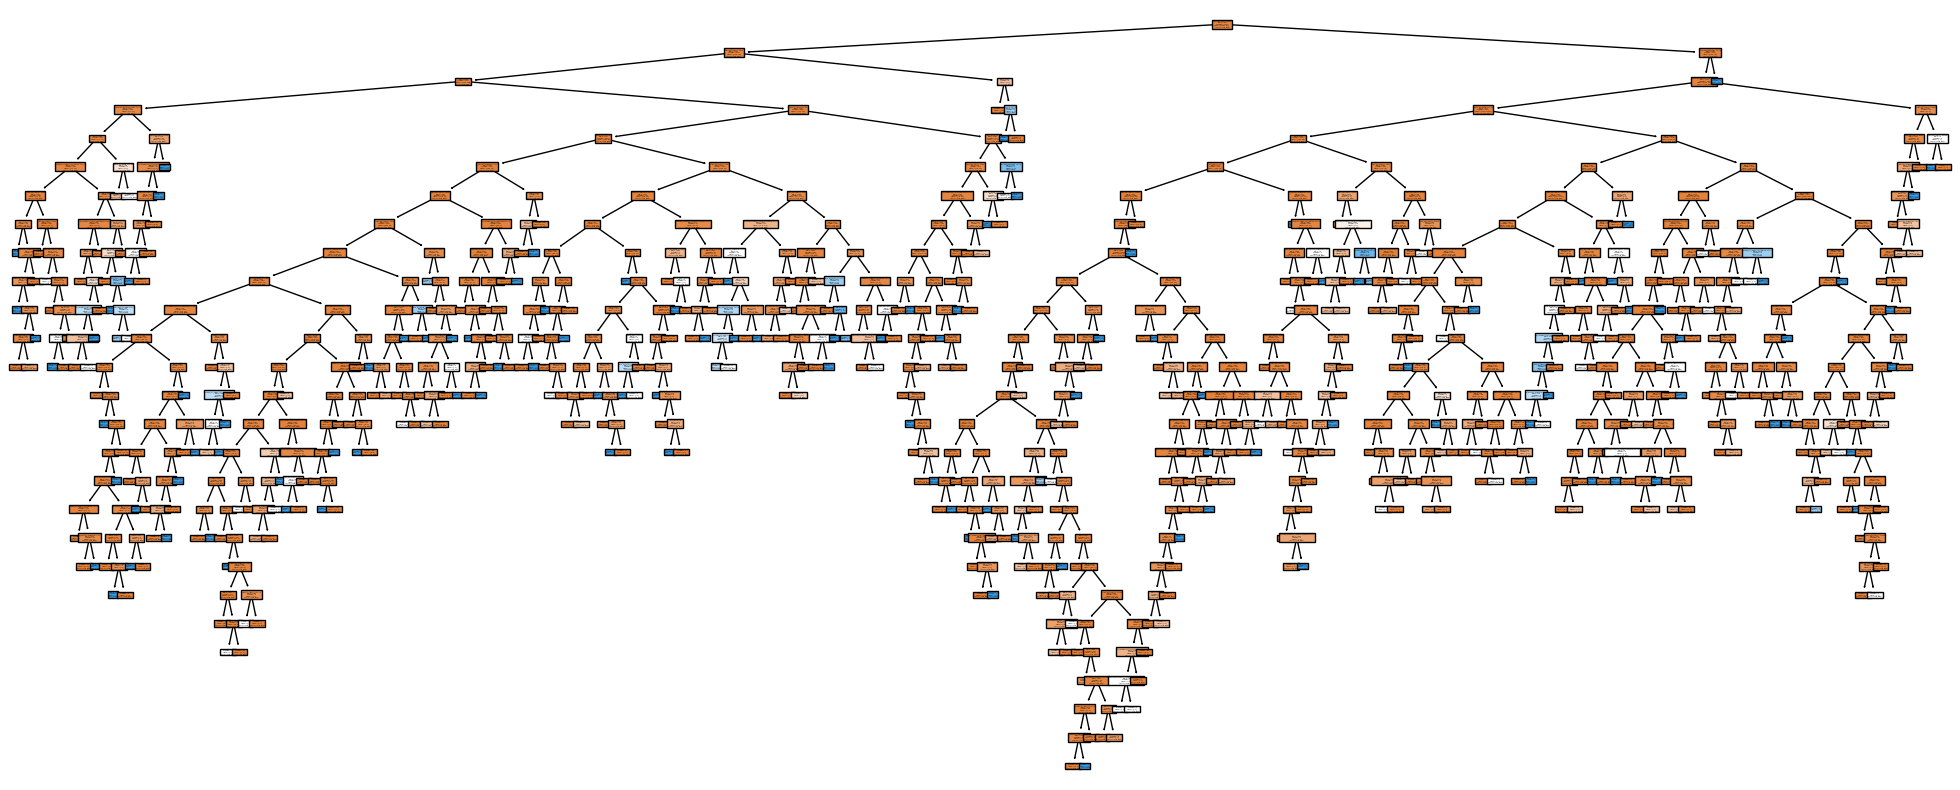

In [24]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['possui_email', 'mau'],
          feature_names=list(X.columns));

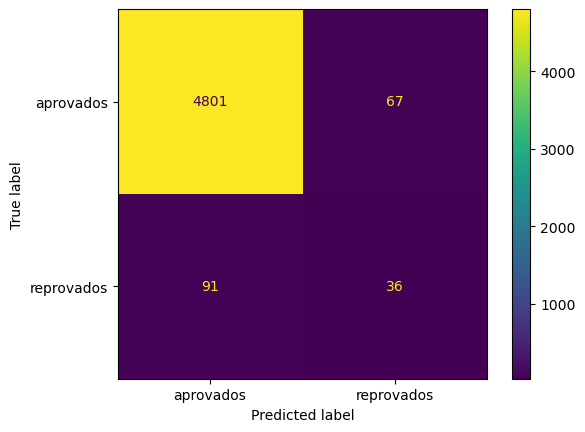

In [26]:
# Predições na base de teste
y_pred = clf.predict(X_test)

# Matriz de confusão com a ordem dos rótulos [False, True]
cm = confusion_matrix(y_test, y_pred, labels=[False, True])

# Plot com rótulos pedidos
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['aprovados', 'reprovados'])
disp.plot()

In [35]:
#Acurácia na Treino
acc_train = clf.score(X_train, y_train)
print('Acurácia (treino):', round(acc_train, 4))

Acurácia (treino): 0.9911


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [30]:
y_pred = clf.predict(X_test)

# Visualizando as primeiras previsões para conferir
y_pred[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

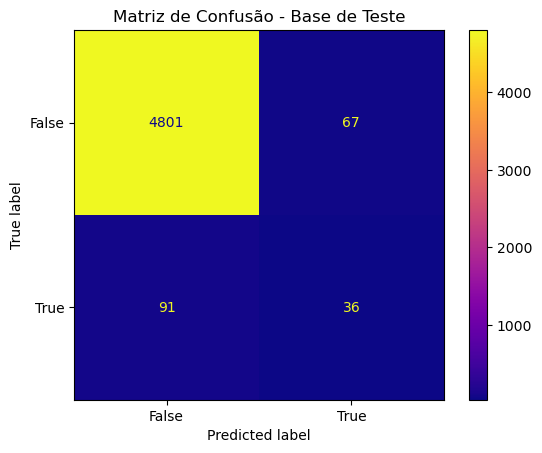

In [31]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

In [32]:
# Acurácia no teste
acc_test = clf.score(X_test, y_test)
print('Acurácia (teste):', round(acc_test, 4))

# Comparando
print('Acurácia (treino):', round(acc_train, 4))


Acurácia (teste): 0.9684
Acurácia (treino): 0.9911


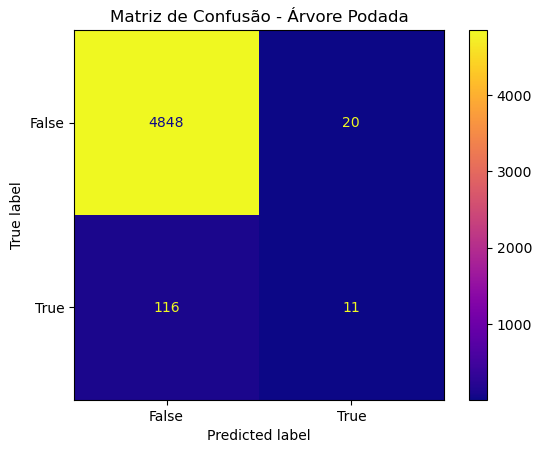

Proporção classificados como maus: 0.0062


In [33]:
# Treinar árvore com poda
clf_podada = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    random_state=123
)

clf_podada.fit(X_train, y_train)

# Predições no teste
y_pred_podada = clf_podada.predict(X_test)

# Matriz de confusão
cm_podada = confusion_matrix(y_test, y_pred_podada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_podada,
                              display_labels=clf_podada.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title("Matriz de Confusão - Árvore Podada")
plt.show()

# Proporção de proponentes classificados como 'maus'
prop_maus = (y_pred_podada == 1).mean()
print('Proporção classificados como maus:', round(prop_maus, 4))

In [34]:
# Criando predição ingênua: todos = 0 ('bom')
y_pred_bom = np.zeros_like(y_test)

# Calculando acurácia
acc_bom = accuracy_score(y_test, y_pred_bom)
print('Acurácia (todos bons):', round(acc_bom, 4))

Acurácia (todos bons): 0.9746
